# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('display.max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [2]:
#your code here
wnba = pd.read_csv("../data/wnba_clean.csv")
print(wnba.shape)
wnba.head()

(142, 33)


,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [3]:
# your answer here
# In the previous analysis, weight in the sample data was seen to be approximately normal distributed. So the normal 
# distribution can be used to make predictions about this data, inferring from the sample to the population.
# As mean and std are influenced by outliers, I'll do the analysis without them.

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [12]:
# your code here
sample_mean = wnba[wnba["Weight"]<109]["Weight"].mean()
sample_std = wnba[wnba["Weight"]<109]["Weight"].std(ddof=1)
sample_n = len(wnba[wnba["Weight"]<109])

confidence_interval95 = stats.t.interval(0.95, sample_n-1, loc = sample_mean, scale = sample_std/np.sqrt(sample_n))

print(f"The confidence interval for 95% is {confidence_interval95}")

The confidence interval for 95% is (76.77436470955581, 80.21134957615848)


**What can you say about these results?**

In [10]:
#your-answer-here
#Based on this sample, one can say with 95% confidence that the mean weight of a female professional basketball player is 
# between 76.8 kg and 80.2 kg. Even though the minimum weight in the data is 55 kg, this can be seen as a far outlier, not a rule.

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [9]:
#your-answer-here
#"This means that with 67kg, the sister is outside of the CI of 95%. Starting from this sample, the answer is yes,
#     she is to far removed from the mean to play professionally. With 95% confidence one can say that she would not be 
#     a professional basketball player.

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

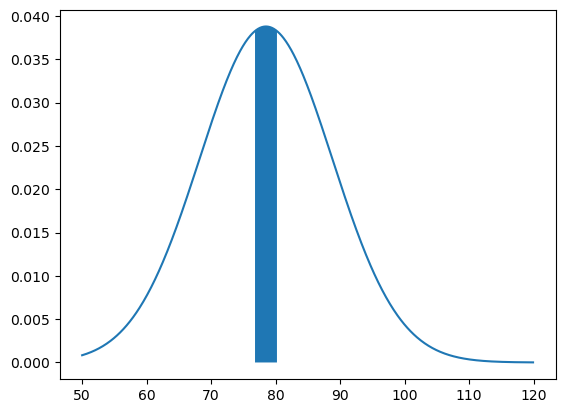

0.24285714285714285

In [20]:
# your code here
x = np.arange(50, 120, 0.1)
pdf = stats.norm.pdf(x, sample_mean, sample_std)

plt.plot(x, pdf)

low = confidence_interval95[0]
high = confidence_interval95[1]
plt.fill_between(x, pdf, where=(low < x) & (x < high))

plt.show()

## what is the probability of getting a value between 0 and 67?
#probability for values 67 and under:
prob67 = len(x[x<=67])/len(x)
prob67
# prob67 is only 0.24285.

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [29]:
# your answer here
# I guess the sample is good enough, it has the FT% column I can base this on. This column shows the success rate.
# The players that never did any Free Throws have to be taken out of the sample.
# Then the players can be devided into two groups: failing more than 40% or not. The CI can be computed for 
# each group. If they do not overlap, I can say there is a statistical distinction between good free throwers and bad ones.
# Then I can count the numbers in the groups to get a percentage. If they do overlap, nothing can be said.
# First it has to be checked if there is enough data for 2 groups to be formed
ft_fail40plus = wnba[(wnba["FT%"]<60) & (wnba["FTA"]>0)]
ft_win40plus = wnba[wnba["FT%"]>=60]
print(len(ft_fail40plus), len(ft_win40plus)) #9 in the failing group, 128 in the success group
#9 is to small for a serious sample, but still trying...

9 128


**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [34]:
# your code here
sampleF_mean = ft_fail40plus["FT%"].mean()
sampleF_std = ft_fail40plus["FT%"].std(ddof=1)
sampleF_n = len(ft_fail40plus["FT%"])

confidence_interval95_F = stats.t.interval(0.95, sampleF_n-1, loc = sampleF_mean, scale = sampleF_std/np.sqrt(sampleF_n))

print(f"The confidence interval for 95% is {confidence_interval95_F}, for the group failing more often than 40%.")

sampleW_mean = ft_win40plus["FT%"].mean()
sampleW_std = ft_win40plus["FT%"].std(ddof=1)
sampleW_n = len(ft_win40plus["FT%"])

confidence_interval95_W = stats.t.interval(0.95, sampleW_n-1, loc = sampleW_mean, scale = sampleW_std/np.sqrt(sampleW_n))

print(f"The confidence interval for 95% is {confidence_interval95_W}, for the group winning more often than 40%.")

sampleT_mean = wnba[wnba["FTA"]>0]["FT%"].mean()
sampleT_std = wnba[wnba["FTA"]>0]["FT%"].std(ddof=1)
sampleT_n = len(wnba[wnba["FTA"]>0])

confidence_interval95_T = stats.t.interval(0.95, sampleT_n-1, loc = sampleT_mean, scale = sampleT_std/np.sqrt(sampleT_n))

print(f"The confidence interval for 95% is {confidence_interval95_T}, for the total sample, anyone who ever tried a FT.")

The confidence interval for 95% is (45.67922400170247, 57.542998220519756), for the group failing more often than 40%.
The confidence interval for 95% is (78.8544980339935, 82.13300196600649), for the group winning more often than 40%.
The confidence interval for 95% is (76.61801131713665, 80.57468941279032), for the total sample, anyone who ever tried a FT.


**What can you comment about our result? What would you tell your sister?**

In [31]:
#your-answer-here
# There is a clear distinction, the two confidence intervals of winners making more than 40% of free throws 
# versus making less than 40% do not overlap. With 95% confidence, players are either good or bad at Free Throws.
# So the percentage of good vs bad throwers in the sample is:
bad_throwers_percent = len(ft_fail40plus)/len(wnba[(wnba["FTA"]>0)]) # 0.06569343065693431
good_throwers_percent = len(ft_win40plus)/len(wnba[(wnba["FTA"]>0)]) # 0.9343065693430657

#In this sample, 93 % of the players who did attempt free throws were good at it, with a success rate higher than 60%.
#So no, the sister is not right, players do not generally miss more than 40% of Free Throws, only a few do.

# Calculating the mean percentage for the total group, it falls with a confidence of 95% between 76 and 80 %. That is the 
# general success rate, which also puts the failure rate with 95% confidence only between 22% and 28%

0.9343065693430657

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [ ]:
#your code here

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
#your-answer-here
# There is the column AST which counts assists. So I can check, if 52 is an average that would be reached with only the 
# WNBA players, and if that is not true, if only WNBA players are probable to show a higher average of assists.

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [37]:
#your code here
# 1. Set the hypothesis
# H0: mu = 52
# H1: mu != 52
mu = 52

# 2. Choose significance / confidence level
alpha = 0.05

# 3. Sample
# wnba["AST"]

# 4. Compute statistic
# 5. Get p-value
print(f'Sample mean is {wnba["AST"].mean()} and sample std is {wnba["AST"].std(ddof=1)}.')
result = stats.ttest_1samp(wnba["AST"], mu)
print(result)

# 6. Decide
result.pvalue < alpha
#To reject H0, 
# 1. p has to be smaller than alpha.

Sample mean is 44.514084507042256 and sample std is 41.49078952999804.
TtestResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166, df=141)


True

In [39]:
#your-answer-here
## TRUE -> can reject H0 -> can say that the average number of assists for WNBA players is not 52

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [40]:
#your-answer-here
# 1. Set the hypothesis
# H0: mu <= 52
# H1: mu > 52
mu = 52

# 2. Choose significance / confidence level
alpha = 0.05

# 3. Sample
# wnba["AST"]

# 4. Compute statistic
# 5. Get p-value
print(f'Sample mean is {wnba["AST"].mean()} and sample std is {wnba["AST"].std(ddof=1)}.')
result = stats.ttest_1samp(wnba["AST"], mu, alternative="greater")
print(result)

# 6. Decide
result.pvalue < alpha
#To reject H0, 
# 1. p has to be smaller than alpha.
# 2. the sign of my statistic needs to be in the direction of the alternative
## FALSE, and the sign of the statistic is (-), H1 is (+) -> can't reject H0 -> the average number of assists for WNBA players 
#  can't be proven to not be less than 52%.

Sample mean is 44.514084507042256 and sample std is 41.49078952999804.
TtestResult(statistic=-2.1499947192482898, pvalue=0.9833692293229463, df=141)


False

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [ ]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [ ]:
#your-answer-here

# goodness of fit: 
# bin the weight data to get a frequency table
# then get the distribution-curve, from that extract the expected values. 
# Then check if observed and expected are close enough.

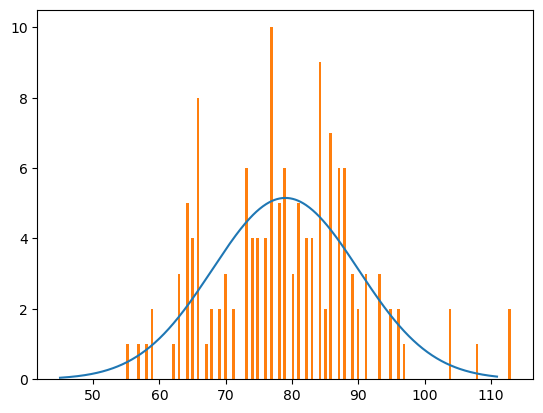

In [61]:
#visual check of data vs normal distribution:
sample_mean = wnba["Weight"].mean()
sample_std = wnba["Weight"].std(ddof=1)
sample_n = len(wnba)

x = np.arange(int(sample_mean-3*sample_std), int(sample_mean+3*sample_std), 0.1)
pdf = stats.norm.pdf(x, sample_mean, sample_std)

plt.plot(x, pdf*sample_n)
plt.hist(wnba["Weight"], sample_n)

plt.show()

In [ ]:
# could not get it to work with a normal distribution. so I did the comparison with poisson instead...
# I would really be curious how to do it with a normal distribution!
# my calculated expected probabilities never got correct, so I could not go on...

5.21830985915493
12 142 [ 5 13 16 16 28 24 24  8  3  2  1  2]
12 142.0 [ 4.01360872 10.47212697 18.21560114 23.76366275 24.80123113 21.57008482
 16.07991232 10.48874563  6.08150275  3.17351657  1.50549026  1.83451695]
Power_divergenceResult(statistic=11.01635140053842, pvalue=0.44189442426470077)
False
False -> I cannot reject the H0, this can be a poisson distribution.


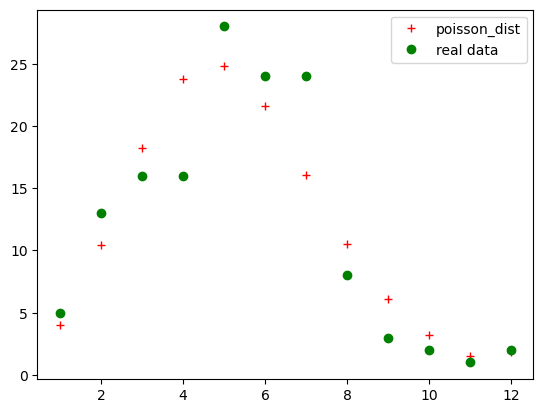

In [144]:
# your code here
# turn the Observation into frequency counts by binning them:
bins = pd.cut(wnba["Weight"], [50,60, 65,70,75,80,85,90,95,100,105,110,120], labels=[1,2,3,4,5,6,7,8,9,10,11,12])
bins_sorted = bins.value_counts().sort_index()

Obs = np.array(bins_sorted)
mean = (np.array([(i+1)*val for i,val in enumerate(Obs)]).sum()/sum(Obs))
print(mean) #bin number, not mean weight

#go for poisson because I don't know how to with normal dist.
from scipy.stats import poisson
poisson_dist = poisson(mean)
poisson_pmfs = np.array([poisson_dist.pmf(i) for i in range(1,12)])
#append the last value for "anything outside":
poisson_pmfs = np.append(poisson_pmfs, 1 - poisson_pmfs.sum())
poisson_pmfs

Exp = poisson_pmfs*sum(Obs)
print(len(Obs), sum(Obs), Obs)
print(len(Exp), sum(Exp), Exp)

chisquare = stats.chisquare(f_obs = Obs, f_exp = Exp) 
print(chisquare)
print(chisquare.pvalue < 0.05)
print("False -> I cannot reject the H0, this can be a poisson distribution.")

##just for fun, visualize it:
x = np.arange(1,13)
plt.plot(x, Exp, "r+", label='poisson_dist')
plt.plot(x, Obs, "go", label='real data')
plt.legend()
plt.show()

**What are your comments in regards to the results of the test?**

In [ ]:
#visually it looked good, but I could not make a goodness-of-fit-test with a normal distribution.
#the binned data also fits well in a poisson distribution...